In [5]:
import numpy as np
from numpy.linalg import inv, pinv
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import stats
import pandas as pd

In [6]:
ls = pd.read_csv('./hw1x.dat',header=None, engine='python')
lsy = pd.read_csv('./hw1y.dat',header=None, engine='python')

#  Question 2a

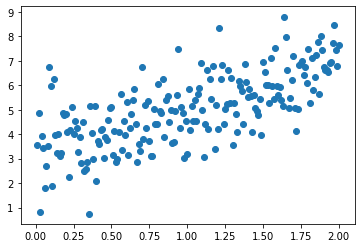

In [7]:
plt.scatter(ls, lsy)
plt.show()

# Question 2b

In [8]:
def linear_reg(ls,lsy):
    ones = np.ones(shape=ls.shape)
    arr = np.concatenate((ones, ls),1)
    coeffs = inv(arr.transpose().dot(arr)).dot(arr.transpose()).dot(lsy)
    return coeffs

In [9]:
coeffs = linear_reg(ls,lsy)
print(coeffs)

[[3.2447227 ]
 [1.78157138]]


In [10]:
def plot_graph(coeffs,arrx,arry):
    c = coeffs[0]
    m = coeffs[1]
    x = np.linspace(0,2,10)
    y = m*x+c

    plt.scatter(arrx,arry)
    plt.plot(x, y, '-r', label='line')
    plt.title('Graph')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

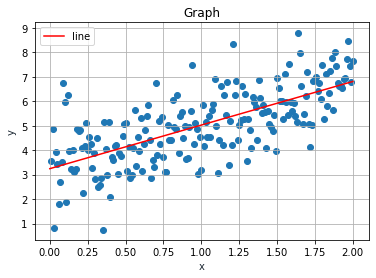

In [11]:
# Plotting Graph for 2a
plot_graph(coeffs,ls,lsy)

# Question 2c

In [12]:
def training_error(coeffs,arrx,arry):
    thetadotx = (coeffs[1] * np.array(arrx,dtype= 'float64')) + coeffs[0]
    n = len(arrx)
    y_min_thetadotx = arry - thetadotx
    y_min_thetadotx_squared = np.square(arry - thetadotx)
    error = np.sum(y_min_thetadotx_squared)/(2*n)
    return error[0]

In [13]:
err = training_error(coeffs,ls,lsy)
print('The error is: '+ str(err))

The error is: 0.5812605752543938


# Question 2d: Gradient Descent

In [394]:
def gd(arrx, arry,learning_rate=0.01, epochs=100):
    theta = np.zeros(2)
    ones = np.ones(shape=ls.shape)
    arrx_array = np.concatenate((ones, ls),1)
    arry_array = np.array(arry, dtype='float64')
    n = len(arrx)
    minloss = 10**10
    bestTheta = 0
    
    for j in range(epochs):
        for i in range(n):
            predVal = np.dot(theta, arrx_array[i])               
            y_min = arry_array[i] - predVal
            theta += learning_rate * y_min * arrx_array[i]
            loss = training_error(theta, arrx,arry)
            if loss < minloss:
                minloss = loss
                bestTheta = np.copy(theta)
    return bestTheta , minloss
    

In [409]:
gd_theta, gd_minloss = gd(ls,lsy)
print('The minimum theta using Gradient Descent is: ' + str(gd_theta) + '\nThe error is: ' + str(gd_minloss))

The minimum theta using Gradient Descent is: [3.10638393 1.89593271]
The error is: 0.5837141849225412


# Question 2e: Stochastic Gradient Descent

In [470]:
def sgd(arrx, arry,learning_rate=0.01, epochs=50):
    theta = np.zeros(2)
    ones = np.ones(shape=arrx.shape)
    arrx_array = np.concatenate((ones, ls),1)
    arry_array = np.array(arry, dtype='float64')
    n = len(arrx)
    minloss = 10**10
    bestTheta = 0
       
    a = np.random.choice(range(n), n, replace=False)
    
    for j in range(epochs):
        a = np.random.choice(range(n), n, replace=False)
        for i in range(n):            
            predVal = np.dot(theta, arrx_array[a[i]])               
            y_min = arry_array[a[i]] - predVal
            theta += learning_rate * y_min * arrx_array[a[i]]
            loss = training_error(theta, arrx,arry)
            if loss < minloss:
                minloss = loss
                bestTheta = np.copy(theta)
    return bestTheta , minloss

In [472]:
sgd_theta, sgd_minloss = sgd(lsy, ls)
print('The minimum theta using Stochastic Gradient Descent is: ' + str(sgd_theta)+ '\n The error is: ' + str(sgd_minloss))

The minimum theta using Stochastic Gradient Descent is: [0.13572266 0.18545818]
 The error is: 0.09679907524959415


# Question 2f: PolyRegress

In [450]:
def polyregress(x,y,d):
    x_list = []
    for i in range(d+1):
        x_i = x**i
        x_list.append(x_i)
    x = np.hstack(x_list)
    coeffs = pinv(x.transpose().dot(x)).dot(x.transpose()).dot(y)
    return coeffs

In [456]:
poly_theta = polyregress(ls,lsy, 3)

for i in range(len(poly_theta)):
    print('x**'+ str(i)+' coefficient: '+ str(poly_theta[i][0]))

x**0 coefficient: 3.5239494311254185
x**1 coefficient: 1.1184651155663974
x**2 coefficient: 0.0809026671857227
x**3 coefficient: 0.1378750380763898


# Question 2g

In [447]:
def poly_training_error(coeffs, arrx, arry):
    n = len(arrx)
    thetaTx = 0
    for i in range(len(coeffs)):
        thetaTx += coeffs[i].transpose() * (np.array(arrx,dtype='float64')**i)
    thetax = np.sum(thetaTx, axis = 1).reshape((len(arrx),1))
    y = np.square(arry - thetax)
    error = np.sum(y) / (2*n)
    return error

In [445]:
empirical_risk(poly_theta, ls,lsy)

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [448]:
for i in range(2,10):
    poly_theta = polyregress(ls,lsy, i)
    poly_train_error = poly_training_error(poly_theta, ls,lsy)
    print('TRAINING ERROR FOR ITERATION ' + str(i) + " is: "+str(poly_train_error[0]))

TRAINING ERROR FOR ITERATION 2 is: 0.5703016121648224
TRAINING ERROR FOR ITERATION 3 is: 0.5700844364691349
TRAINING ERROR FOR ITERATION 4 is: 0.5646163879286425
TRAINING ERROR FOR ITERATION 5 is: 0.5638968184749199
TRAINING ERROR FOR ITERATION 6 is: 0.5613433038902972
TRAINING ERROR FOR ITERATION 7 is: 0.5562352515818797
TRAINING ERROR FOR ITERATION 8 is: 0.5537805799190961
TRAINING ERROR FOR ITERATION 9 is: 0.5529231059839151


In [419]:
def PolyCoefficients(x, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

Degree:  2


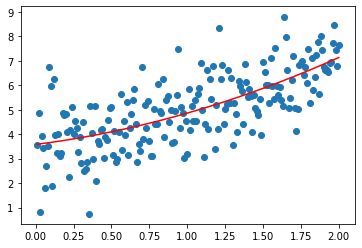

Degree:  3


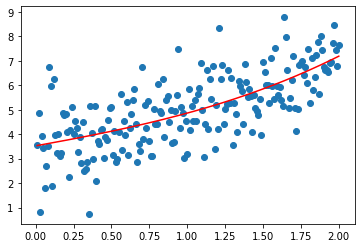

Degree:  4


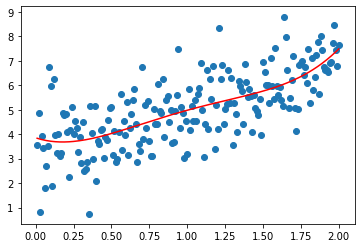

Degree:  5


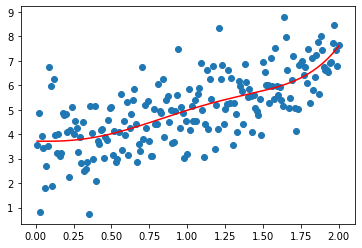

Degree:  6


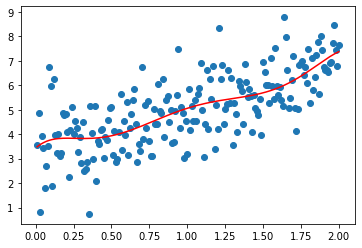

Degree:  7


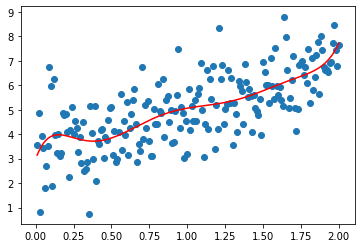

Degree:  8


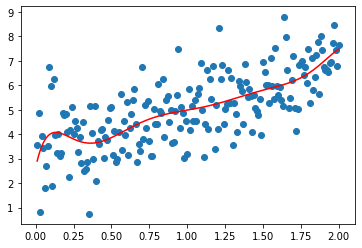

Degree:  9


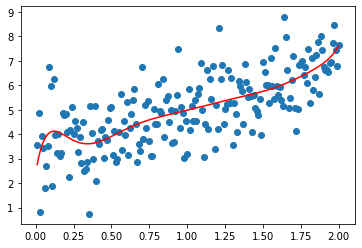

In [426]:
for i in range(2,10):
    print('Degree: ', i)
    poly_theta = polyregress(ls,lsy, i)
    x = np.linspace(0,2,10)
    plt.scatter(ls,lsy)
    plt.plot(ls, PolyCoefficients(ls, poly_theta), color= 'red')
    plt.show()